# Exploratory Analysis and Data Cleaning

In [7]:
# Packages for data cleaning, plotting, and manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit-learn libraries/functions/classes

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.linear_model import LogisticRegression, RidgeCV
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
#                              StackingClassifier, ExtraTreesClassifier
# from sklearn.dummy import DummyClassifier
# from sklearn.compose import ColumnTransformer

In [8]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally;
# feel free to comment out if undesired

pd.set_option('display.max_columns', None)

# Data Loading and Overview

Descriptions of each column can be found at [this link](data_dict_basic.txt) within this repository.

In [9]:
# Importing training data
train_val = pd.read_csv('../data/training_set_values.csv')

# Only using `status_group` column from label set, to
# avoid duplicating `id` column
train_label = pd.read_csv('../data/training_set_labels.csv',
                             usecols = ['status_group'])


# Test set - not to be used until models have been trained,
# internally validated, etc.

test_df = pd.read_csv('../data/test_set_values.csv')

In [10]:
# Concatenating separate .csv files
df = pd.concat(objs = [train_val, train_label],
               axis = 1)

In [11]:
# Quick readout
df.sample(n = 5,
          random_state = 138)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
27487,60684,0.0,2013-02-15,Dwe,1137,DWE,37.136702,-4.075092,Madukani,0,Pangani,Madukani,Manyara,21,4,Simanjiro,Naberera,200,True,GeoData Consultants Ltd,VWC,Lendanai pipe scheme,True,1996,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
52964,457,0.0,2011-04-06,NaN,0,NaN,34.368774,-8.767996,Kwa Mzee Lusambo,0,Rufiji,Barabarani,Mbeya,12,7,Mbarali,Rujewa,0,False,GeoData Consultants Ltd,Water Board,NaN,True,0,gravity,gravity,gravity,water board,user-group,never pay,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,non functional
26478,7855,50.0,2011-03-24,Private Individual,-8,Da,38.991011,-6.537616,Bakari,0,Wami / Ruvu,Mchanga Wa Kichwa A,Pwani,6,1,Bagamoyo,Zinga/Ikerege,30,True,GeoData Consultants Ltd,Company,Bagamoyo wate,True,2011,ksb,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59113,50299,0.0,2013-03-19,Government Of Tanzania,1068,DWE,36.806314,-3.448869,Kwa Elishirikiamwea Swai,0,Pangani,Upendo,Arusha,2,2,Arusha Rural,Mlangarini,150,True,GeoData Consultants Ltd,VWC,Machumba estate pipe line,True,1988,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,other,other,functional
14153,70382,0.0,2011-07-27,He,0,HE,31.635313,-1.718094,Kabubuya,0,Lake Victoria,Bubuya,Kagera,18,3,Muleba,Ijumbi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,hand pump,hand pump,non functional


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

We have about **forty** potential features here, indicated by columns `0` through `39`; column `40`, `status_group`, is our target variable. The majority (30) of those columns  are currently stored as type `object`, the remainder as either `int64` or `float64`. Whether or not the numeric type columns contain continuous data will require further investigation.

In [13]:
# 59,400 rows of data in our training set
print(f'Train set: {df.shape[0]} rows')

# 14,850 rows of data in our test set
print(f'Test set: {test_df.shape[0]} rows')

Train set: 59400 rows
Test set: 14850 rows


In [14]:
# Checking datatypes of columns

df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [15]:
# Descriptive stats on numerical columns

df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Takeaways:**
- `id` is purely an identifier - it's not going to be useful for modeling purposes.
- It's unlikely that `num_private` will be, either - we have a lot of data missing in this column (see the values for `min`, `25%`, `50%`, and `75%` in the descriptive statistics table), and the data dictionary has no articulation of what the values in this column actually indicate.
- `construction_year` has a `mean` heavily impacted by zero values; we'll need to handle this somehow.
- `gps_height`, `longitude`, and `latitude` are all numerical representations of location data.
- What unit is `population` in? We'll likely need to scale this; we also have a `max` value that's *well* above the `75%` value in that column.
    - The same applies for `amount_tsh`, which measures the total amount of water available to the waterpoint (the 'total static head')
- `region_code` and `district_code` look like discrete, categorical data.

## Null values & duplicate records

In [17]:
# Checking for null values in features columns

df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Columns/features with large numbers of **null values**, from least to greatest quantity:

- `subvillage` (371)
- `permit` (3056)
- `public_meeting` (3334)
- `funder` (3635)
- `installer` (3655)
- `scheme_management` (3877)
- `scheme_name` (28166) **(!)**

In [18]:
# Creating a list of columns with null values

has_nulls = []

for col in df:
    if df[col].isna().sum() != 0:
        has_nulls.append(col)

In [19]:
# What about duplicate rows?

df.duplicated().value_counts()

False    59400
dtype: int64

No duplicate rows - makes sense, given that this is a dataset curated for a competitiom.

## Distribution of `y`

In [20]:
df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

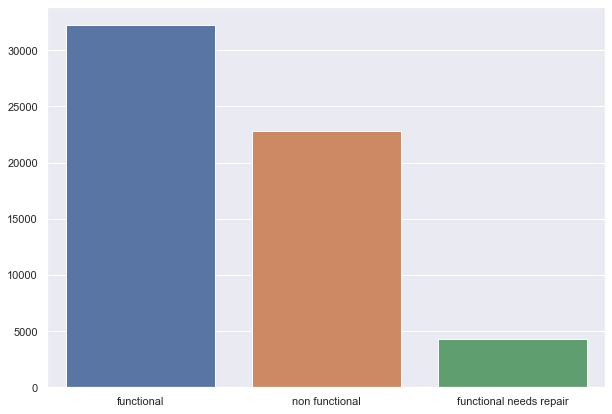

In [21]:
plt.figure(figsize=(10,7))

sns.set_theme()
sns.barplot(x = df.status_group.value_counts().index,
            y = df.status_group.value_counts().values);

The low number of records in the `functional needs repair` status group (~7.2% of the data) presents the challenge of a class imbalance; we may need to use something like synthetic minority oversampling i.e. `SMOTE` when modeling.

# Data Comprehension and Cleaning

## Feature investigation

Now, I'll look into the columns a little more. Since a lot of these columns are in `object` format, what's contained within them might not be immediately clear.

`basin` piqued my interest, and it's an easy way to take an exploratory dive into some categorical data, as my `.info()` indicated there are no null values in the `basin` column.

In [23]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

Nine categories in total for `basin`, each of which (other than `Internal`) represents a body of water. We can use sk-learn's `OneHotEncoder` transformer on this column.

Instinct tells me that the year a waterpoint was constructed might be a decent predictor of a waterpoint's functionality. Let's see what the most frequently occuring values for `construction_year` are in the dataset.

In [25]:
df.construction_year.value_counts().head(20)

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
Name: construction_year, dtype: int64

In [26]:
df.construction_year.median()

1986.0

In [27]:
df.construction_year.value_counts().shape

(55,)

Records for 55 years, but the most common value is `0` - so probably more like 54 years, with waterpoints built between 2004 and 2011 making up the top ten most frequently occurring values. Though the pandas `.info()` and `.isna()` methods did not recognize any *null* values in the `construction_year` column, we have plenty of rows where `construction_year` was entered as `0`, which will require some munging/imputing.

In [28]:
print(f'Mean population: {np.mean(df.population.value_counts())}')
print(f'Median population: {np.median(df.population.value_counts())}')

Mean population: 56.625357483317444
Median population: 3.0


In [29]:
df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

A lot of zeroes in the `population` column. Let's look into that, if only briefly...

In [31]:
df.loc[df.population == 0].sample(n = 5,
                                  random_state = 138)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
45592,13977,0.0,2011-03-26,Water,0,Gover,36.488600,-7.198751,Kisiwani,0,Rufiji,Vikundi,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59371,20387,0.0,2012-10-09,Netherlands,0,DWE,33.586406,-3.040369,Ushirika,0,Lake Victoria,Chambwa,Shinyanga,17,2,Maswa,Kulimi,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
29587,21411,8000.0,2013-02-23,Songea District Council,1486,DWE,35.281597,-9.758611,Kwa George,0,Lake Nyasa,Mapinduzi A,Ruvuma,10,2,Songea Rural,Wino,0,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa wino,True,2011,submersible,submersible,submersible,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
29704,8958,0.0,2011-04-04,Water,0,Commu,35.987864,-6.218267,Kwa Tangoo,0,Wami / Ruvu,Mnadani,Dodoma,1,5,Dodoma Urban,Kikombo,0,True,GeoData Consultants Ltd,VWC,Kiko,False,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
53568,65564,0.0,2011-03-23,Danida,1802,DWE,35.329705,-8.370343,none,0,Rufiji,I,Iringa,11,2,Mufindi,Luhunga,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Hm - looks like instances where *one* zero was inputted, e.g. in the columns `construction_year` or `population`, other data is missing, too. Columns that may have inappropriately represented zero values (not initiually identified as nulls due to the way `.info()` recognizes null values) - include...

- `amount_tsh`
- `gps_height`
- `num_private`
- `population`
- `scheme_name`
- `construction_year`

Before we dig into dealing with those zeroes with imputation, let's revisit and further examine the other columns that have `NaN` values.

In [33]:
has_nulls

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

`funder` and `installer` seem, at a glance, to be potentially related categories. Let's look at them in tandem.

In [34]:
print(df.installer.value_counts())
print('\n')
print(df.funder.value_counts())

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
                            ...  
Heri mission                    1
Grail Mission Kiseki bar        1
is                              1
BOAZI                           1
kanisa                          1
Name: installer, Length: 2145, dtype: int64


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Tredsp                       1
Worldvision                  1
Lc                           1
Cvs Miss                     1
Mow                          1
Name: funder, Length: 1897, dtype: int64


Both `installer` and `funder` have several thousand rows with null values, in addition to the large number of unique values in each column (2145 and 1897, respectively).

In [90]:
df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [91]:
df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

We have *several* other columns that contain location information - what does `subvillage` have to offer, if anything, that's unique or useful?

In [35]:
df.subvillage.value_counts()

Madukani             508
Shuleni              506
Majengo              502
Kati                 373
Mtakuja              262
                    ... 
Songambele Kusini      1
Udamasicheki           1
Ibolero                1
Gomba                  1
Nkambi                 1
Name: subvillage, Length: 19287, dtype: int64

**19,287** unique values in the `subvillage` column - that'll present a problem when one-hot encoding, and the information stored in this column is unlikely to be helpful in our modeling.

`date_recorded` and `recorded_by` seem to be for more archival purposes than observation-based data... let's see what's stored in those columns.

In [36]:
print(df['date_recorded'].value_counts().head(20))
print('\n')
print(df['recorded_by'].value_counts())

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
Name: date_recorded, dtype: int64


GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64


The data looks to have been gathered largely across the first calendar months of 2011 and 2013, and the data was recorded entirely by one entity - GeoData Consultants Ltd., which appears in all 59,400 rows. Neither column looks particularly useful for modeling purposes.

Let's investigate these two `scheme_` columns next.

In [37]:
# nearly 3,000 unique `scheme_name` values and a load of nulls -
# unlikely this will make into to the modeling stage

print(df['scheme_management'].value_counts())
print('\n')
print(df['scheme_name'].value_counts())

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
Hawe                         1
Kanza                        1
Kashishi water supply        1
Saadani Chumv                1
Kapu chini water supply      1
Name: scheme_name, Length: 2696, dtype: int64


In [100]:
# Minor differences between these two

print(df['management'].value_counts())
print('\n')
print(df['management_group'].value_counts())

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


# Dropping Irrelevant/Redundant Features

In [101]:
# Dropping columns determined to be either irrelevant or
# superfluous in exploratory analysis

cols_to_drop = [
    'id',  # unique identifier, not useful for modeling
    'date_recorded',  # superfluous information, too many unique records
    'recorded_by',  # no unique information + no unique values across 59.4k rows
    'funder',   
    'installer',  # large number of unique values (see also `funder`);
                  # may be added back in later
    'wpt_name',  # identifier column, not useful for modeling
    'num_private',  # data dict. does not provide details for this column
    'subvillage',  # too many unique values - uninformative for modeling
    'region_code',  # redundant information vis-a-visa the simpler `region`
    'district_code',  # may be added back in later
    'lga',
    'ward',  # redundant location data (with `lga`)
    'scheme_management',  # may be added back in later
    'scheme_name',  # large number of nulls, redundant vis-a-vis `scheme_management`
    'extraction_type',
    'extraction_type_group',  # using `extraction_type_class` for generalized info
    'management',
    'management_group',  # may be added back in later
    'payment',  # identical information to `payment_type`
    'water_quality',  # comparable information to `quality_group` - redundant
    'quantity_group',  # identical information to `quantity` - redundant
    'source',  # redundant with other `source_` columns
    'waterpoint_type_group'  # used `waterpoint_type` instead
]

In [102]:
df = df.drop(columns = cols_to_drop).copy()

## Preprocessing

### Pipelines: Scaling and Encoding

Necessary modifications for modeling, to be written into pipelines:

- One-hot encoding:
    - `basin`
    - `extraction_type_class`
    - `payment_type`
    - `permit`
    - `public_meeting`
    - `quality_group`
    - `quantity`
    - `region`
    - `source_type`
    - `source_class`
    - `waterpoint_type`
- Numerical scaling:
    - `population` - (impute zeroes with median?)
    - `gps_height` - impute zeroes with median
    - `latitude` / `longitude` - impute zeroes with mean
    - `construction_year` - use KNN imputing
    
Our target variable, `status_group`, will also be **label encoded** for readability and consistency:
- `0` = 'functional'
- `1` = 'non functional'
- `2` = 'functional needs repair'

#### Subpipe Creation

In [103]:
# Subpipes for imputing median values - to be used for `latitude` and `longitude`
subpipe_lat      = Pipeline(steps=[('num_impute', SimpleImputer(missing_values = -2.000000e-08,
                                                                strategy = 'median')),
                                   ('ss', StandardScaler())])

subpipe_long     = Pipeline(steps=[('num_impute', SimpleImputer(missing_values = 0.000000,
                                                                strategy = 'median')),
                                   ('ss', StandardScaler())])


# Subpipe for imputing median values
subpipe_num      = Pipeline(steps=[('num_impute', SimpleImputer(strategy = 'median')),
                                   ('ss', StandardScaler())])

# Subpipe for `construction_year`
subpipe_year     = Pipeline(steps=[('num_impute', SimpleImputer(missing_values = 0,
                                                                strategy = 'median')),
                                   ('ss', StandardScaler())])

# Subpipe for categorical features including `basin`, `payment_type`
subpipe_cat      = Pipeline(steps=[('freq_imputer_nan', SimpleImputer(strategy = 'most_frequent')),
                                   ('freq_imputer_unk', SimpleImputer(strategy = 'most_frequent',
                                                                      missing_values = 'unknown')),
                                   ('ohe', OneHotEncoder(drop = 'if_binary',
                                                         sparse = False,
                                                         handle_unknown = 'ignore'))])


# Subpipe for the target column, `status_group`
subpipe_label    = Pipeline(steps=[('le', LabelEncoder())])

#### `ColumnTransformer`

In [104]:
# Columns to be passed through numerical pipeline
num_cols = ['amount_tsh',
            'gps_height',
            'population']

# Columns to be passed through categorical pipeline
cat_cols = ['basin',
            'region',
            'payment_type',
            'quantity',
            'quality_group',
            'permit',
            'public_meeting',
            'extraction_type_class',
            'source_type',
            'source_class',
            'waterpoint_type']

In [106]:
ct = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_num, num_cols),
    ('subpipe_year', subpipe_year, ['construction_year']),
    ('subpipe_long', subpipe_long, ['longitude']),
    ('subpipe_lat', subpipe_lat, ['latitude']),
    ('subpipe_cat', subpipe_cat, cat_cols)],
                       remainder = 'passthrough')

# ('subpipe_label', subpipe_label, ['status_group'])

### Train/Test Split and Initial Preparation for ML

In [107]:
# Splitting DataFrame into features/values DataFrame
# (i.e. `X`) and labels series (`y`)

X = df.drop('status_group', axis = 1)
y = df['status_group']

In [108]:
# Splitting internal training data into separate
# training and test sets for (eventual) internal validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 138)

## Modeling

### `DummyClassifier`

In [109]:
dummy_model_pipe = Pipeline(steps=[
    ('ct', ct),
    ('dummy', DummyClassifier())
])

In [110]:
# Fit on training data
dummy_model_pipe.fit(X_train, y_train)

# Score on training data
dummy_model_pipe.score(X_train, y_train)

0.5420875420875421

scikit-learn's `DummyClassifier` predicts on the training data with an accuracy score of ~0.542, equal to the proportion of the **most frequent class** (`functional`). This is because, as a dummy model, it predicts `functional` (the most frequent value) every time.

We'll be looking to improve on that 54.2% accuracy in future models.

### Simple Model 1 - Logistic Regression, default hyperparameters

In [43]:
# Default arguments - max iterations set to 100
logreg_model_simple = Pipeline(steps=[
    ('ct', ct),
    ('logreg', LogisticRegression(random_state = 138))
])

In [44]:
logreg_model_simple.fit(X_train, y_train)

logreg_model_simple.score(X_train, y_train)

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7270968390371375

> First simple model is giving us an accuracy rate of **~72.71%** - and a `ConvergenceWarning`.

#### Simple Model 1.1 - increasing `max_iter`

In [45]:
# Increasing `max_iter` to 1000
logreg_model_more_iter = Pipeline(steps=[
    ('ct', ct),
    ('logreg', LogisticRegression(random_state = 138,
                                  max_iter = 1000))
])

In [46]:
logreg_model_more_iter.fit(X_train, y_train)

logreg_model_more_iter.score(X_train, y_train)

0.7271722197095332

> Increasing `max_iter` from 100 to 1,000 solved the `ConvergenceWarning`; it also resulted in a *slightly* higher accuracy score: **~72.72%**

### Simple Model 2 - new solver (`saga`)

In [47]:
# Adjusting solver - changed from 'lbfgs' to 'saga'
# also dropping `max_iter` back down to default
logreg_model_saga = Pipeline(steps=[
    ('ct', ct),
    ('logreg', LogisticRegression(random_state = 138,
                                  solver = 'saga'))
])

In [48]:
logreg_model_saga.fit(X_train, y_train)

logreg_model_saga.score(X_train, y_train)

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.727021458364742

> Ever-so-slightly worse accuracy score (**~72.70%**) when the solver was changed from `lbfgs` to `saga`. But *still* getting that `ConvergenceWarning`.

### Simple Model 3 - `elasticnet` penalty

In [63]:
# Changed penalty to 'elasticnet', set 'l1_ratio' to 0.6
# Reduced max_iter to 10 -  not much sacrifice in accuracy,
# better processing time w/ ensemble methods
logreg_model_saga_elasnet = Pipeline(steps=[
    ('ct', ct),
    ('logreg', LogisticRegression(penalty = 'elasticnet',
                                  l1_ratio = 0.6,
                                  solver = 'saga',
                                  random_state = 138,
                                  max_iter = 10))
])

In [64]:
logreg_model_saga_elasnet.fit(X_train, y_train)

logreg_model_saga_elasnet.score(X_train, y_train)

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7217699381878486

**~72.70%** - these scores aren't moving very much with manual tuning.

> Note: When we reduce `max_iter` to 10, our accuracy only drops to **~72.18%**. I will use this in the `StackingClassifier` later.

###  Simple Model 4 - Reduced regularization (`C`)

Let's try tuning *one* more hyperparameter in the `LogisticRegression` class before moving on to something else. We'll also drop `max_iter` back down to the default 100 to reduce the amount of processing time needed in future calculations.

In [51]:
# Reduced regularization by inflating C parameter
logreg_less_reg = Pipeline(steps=[
    ('ct', ct),
    ('logreg', LogisticRegression(C = 1e5,
                                  penalty = 'elasticnet',
                                  l1_ratio = 0.6,
                                  solver = 'saga',
                                  random_state = 138))
])

In [52]:
logreg_less_reg.fit(X_train, y_train)

logreg_less_reg.score(X_train, y_train)

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7269712045831449

No better when the `C` value is set slightly higher, i.e. reduced regularization - **~72.70%**.

We're capping out at around **~72.72% accuracy** with various logistic regression models using this set of features. We're also still getting the `ConvergenceWarning`.

### `RandomForestClassifier` (RFC) Model 1

In [53]:
# Simple RFC - minimal changes from default hyperparams
# Starting small w/ max_depth = 10
rfc_model_pipe = Pipeline(steps=[
    ('ct', ct),
    ('rfc', RandomForestClassifier(max_depth = 10,
                                   random_state = 138))
])

In [54]:
rfc_model_pipe.fit(X_train, y_train)

rfc_model_pipe.score(X_train, y_train)

0.7623498668274787

> Accuracy score on the RFC model with default parameters is around **76.23%**, already nearly a 3.5% increase from our best logistic regression model.

### RFC Model 2 - `max_features` to `sqrt`

In [55]:
rfc_pipe_two = Pipeline(steps=[
    ('ct', ct),
    ('rfc', RandomForestClassifier(max_features = 'sqrt',
                                   max_depth = 10,
                                   random_state = 138))
])

In [56]:
rfc_pipe_two.fit(X_train, y_train)

rfc_pipe_two.score(X_train, y_train)

0.7623498668274787

> Identical accuracy score (76.23%) to our first RFC model, even after modifying `max_features` hyperparameter.

### `StackingClassifier` Model 1

In [65]:
estimators = [
    ('logreg_model', logreg_model_saga_elasnet),
    ('rfc_model', rfc_pipe_two)
]

sc_model_pipe = StackingClassifier(estimators)

In [66]:
sc_model_pipe.fit(X_train, y_train)

sc_model_pipe.score(X_train, y_train)

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn

0.7882556912407659

Our third logistic regression model - `logreg_model_saga_elasnet` - and our second RFC model - `rfc_pipe_two` - yielded an accuracy rate of **78.82%** when stacked, our best so far.

It also took **two minutes** to run.

In [67]:
cross_val_score(sc_model_pipe, X_train, y_train).mean()

C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\toast\anaconda3\envs\learn

0.7681037932469231

> After running for about six minutes, we got a mean cross-validation score on this model (`LogisticRegression` and `RandomForestClassifier`, stacked) of **~76.81%**.

# Scrap Code

In [60]:
# X.loc[X['funder'].isna()].head();

In [61]:
# # Accessing one-hot encoded feature names
# ohe_col_names = logreg_model_pipe.named_steps['ct'].named_transformers_['subpipe_cat']['ohe'].get_feature_names_out()

# # Converting to list
# ohe_col_names.tolist()